# ***Digital Photogrammetry:***




## Image Noise Reduction and Edge Detection Using Python

###### Import lib

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
import random

###### Load image and convert to greyscale

(-0.5, 754.5, 374.5, -0.5)

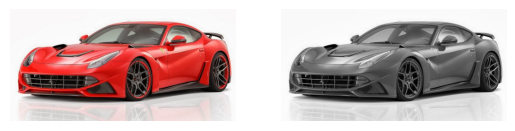

In [ ]:
# Load image and convert to greyscale
img = mpimg.imread('Data/test.jpg')
gray_img = cv2.imread('Data/test.jpg',0)

plt.figure()

plt.subplot(1,2,1)
plt.imshow(img )
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

###### Add noise

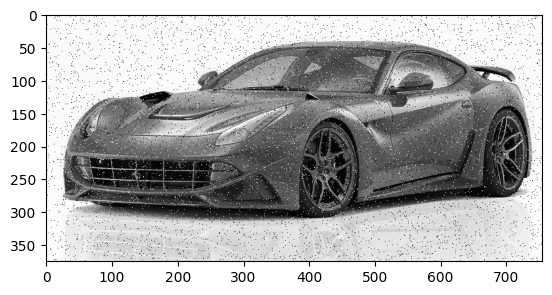

In [ ]:
def AddNoise(image, dens):
    Noisy_img = np.zeros(image.shape, np.uint8)
    tr = 1 - dens
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r = random.random()
            if r < dens:
                Noisy_img [i, j] = 0
            elif r > tr:
                Noisy_img [i, j] = 255
            else:
                Noisy_img [i, j] = image[i, j]
    return Noisy_img

Noise_img = AddNoise(gray_img,0.02)
plt.imshow(Noise_img, cmap='gray')
plt.show()


###### Averaging Filter

kernel_size :  3


(-0.5, 752.5, 372.5, -0.5)

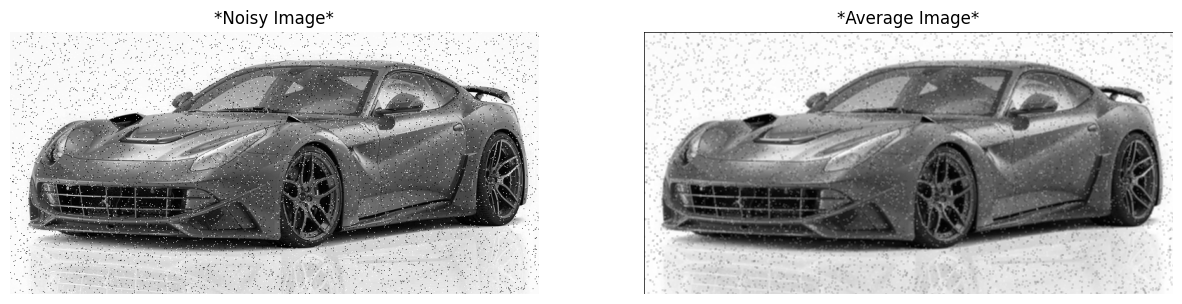

In [ ]:
n = Noise_img.shape
m = int(input("kernel_size :  "))
mask = np.ones([m, m])/(m**2)

average_img = np.zeros([n[0]-(m-1), n[1]-(m-1)])

for i in range(1, n[0]-(m-1)):
  for j in range( 1, n[1]-(m-1)):

      I = Noise_img[i:(i+m), j:(j+m)]
      average_img[i, j] = np.sum(np.double(I)* mask)



plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(Noise_img, cmap='gray')
plt.title("*Noisy Image*")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(average_img , cmap='gray')
plt.title("*Average Image*")
plt.axis('off')

###### Gaussian 2D

(-0.5, 746.5, 366.5, -0.5)

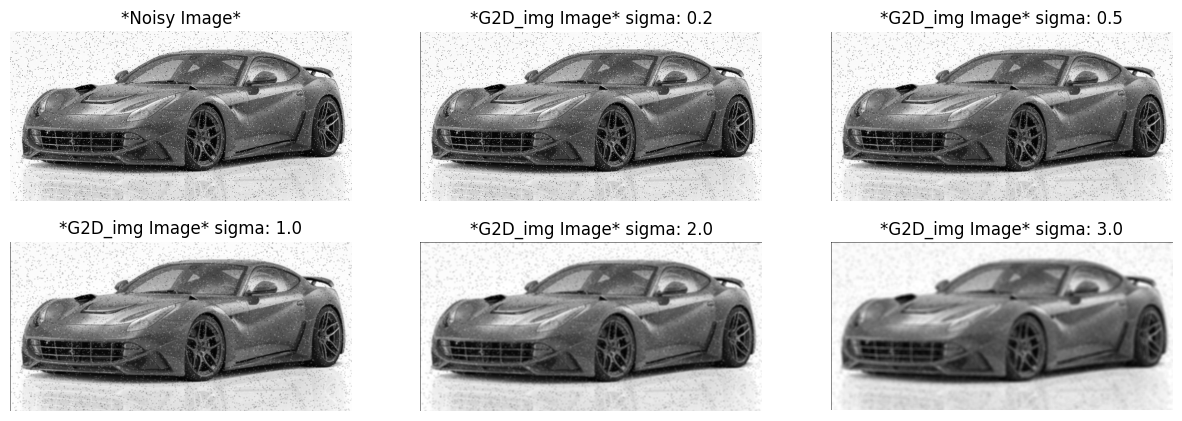

In [ ]:
# s = float(input('Sigma : '))
def gaussian_2d( sigma):
    kernel = 3*sigma
    if kernel <= 3:
      kernel = 3
    elif kernel%2 ==0:
      kernel = kernel - 1
    kernel = int(kernel)

    con = list(range(-(kernel//2), (kernel//2)+1))
    G2D_filter = np.ones((kernel, kernel))
    for i in range(kernel):
        for j in range(kernel):
            G2D_filter[i, j] = (1/(2*np.pi*sigma**2))*np.exp((-(con[i]**2+con[j]**2)/(2*sigma**2)))
    return G2D_filter , kernel

s = np.array([0.2, 0.5, 1, 2, 3])
a = gaussian_2d(s[0])
b = gaussian_2d(s[1])
c = gaussian_2d(s[2])
d = gaussian_2d(s[3])
e = gaussian_2d(s[4])

n = gray_img.shape
# n = Noise_img.shape
def conv(gaussian_2d):
  m=  gaussian_2d[1]
  G2D_filter = gaussian_2d[0]
  G2D_img = np.zeros([n[0]-(m-1), n[1]-(m-1)])
  for i in range(1, n[0]-(m-1)):
    for j in range( 1, n[1]-(m-1)):

        # I = Noise_img[i:(i+m), j:(j+m)]
        I = Noise_img[i:(i+m), j:(j+m)]
        G2D_img[i, j] = np.sum(np.double(I)* G2D_filter)
  return G2D_img

a = conv(a)
b = conv(b)
c = conv(c)
d = conv(d)
e = conv(e)

plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.imshow(Noise_img, cmap='gray')
plt.title("*Noisy Image*")
plt.axis('off')


plt.subplot(2, 3, 2)
plt.imshow(a , cmap='gray')
plt.title(f"*G2D_img Image* sigma: {s[0]}")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(b , cmap='gray')
plt.title(f"*G2D_img Image* sigma: {s[1]}")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(c , cmap='gray')
plt.title(f"*G2D_img Image* sigma: {s[2]}")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(d , cmap='gray')
plt.title(f"*G2D_img Image* sigma: {s[3]}")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(e , cmap='gray')
plt.title(f"*G2D_img Image* sigma: {s[4]}")
plt.axis('off')

###### Gaussian 1D

Sigma : 3


(-0.5, 746.5, 366.5, -0.5)

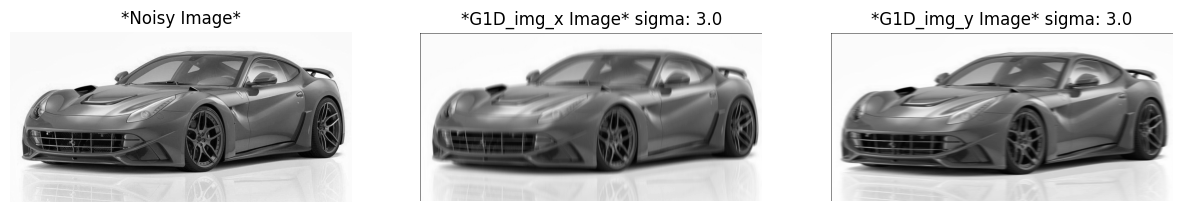

In [ ]:
s = float(input('Sigma : '))
def gaussian_1d( sigma):
    kernel = 3*sigma
    if kernel <= 3:
      kernel = 3
    elif kernel%2 ==0:
      kernel = kernel - 1
    kernel = int(kernel)

    con = list(range(-(kernel//2), (kernel//2)+1))
    G1D_filter_x = np.ones((kernel, kernel))
    G1D_filter_y = np.ones((kernel, kernel))
    for i in range(kernel):
        for j in range(kernel):
            G1D_filter_x[i, j] = (1/(np.sqrt(2*np.pi)*sigma))*np.exp((-(con[i]**2)/(2*sigma**2)))
            G1D_filter_y[i, j] = (1/(np.sqrt(2*np.pi)*sigma))*np.exp((-(con[j]**2)/(2*sigma**2)))

    return G1D_filter_x ,G1D_filter_y, kernel

gaussian_1d(s)

n = gray_img.shape
# n = Noise_img.shape
m=  gaussian_1d(s)[2]
G1D_filter_x = gaussian_1d(s)[0]
G1D_img_x = np.zeros([n[0]-(m-1), n[1]-(m-1)])
G1D_filter_y = gaussian_1d(s)[1]
G1D_img_y = np.zeros([n[0]-(m-1), n[1]-(m-1)])
for i in range(1, n[0]-(m-1)):
  for j in range( 1, n[1]-(m-1)):

      # I = Noise_img[i:(i+m), j:(j+m)]
      J_x = gray_img[i:(i+m), j]
      J_y = gray_img[i, j: (j+m)]
      G1D_img_x[i, j] = np.sum(np.double(J_x)* G1D_filter_x)
      G1D_img_y[i, j] = np.sum(np.double(J_y)* G1D_filter_y)



plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("*Noisy Image*")
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(G1D_img_x , cmap='gray')
plt.title(f"*G1D_img_x Image* sigma: {s}")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(G1D_img_y , cmap='gray')
plt.title(f"*G1D_img_y Image* sigma: {s}")
plt.axis('off')

###### f'

(-0.5, 752.5, 372.5, -0.5)

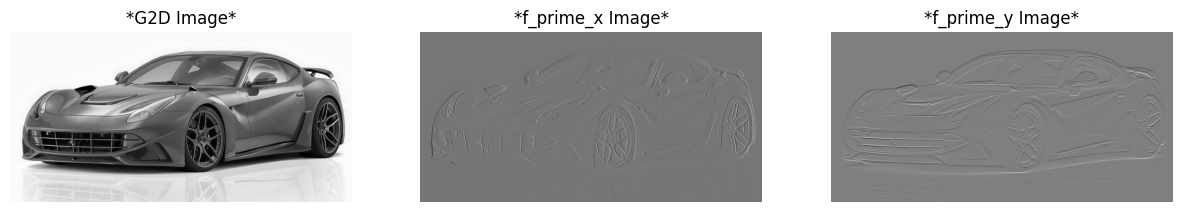

In [ ]:
# n = G2D_img.shape
n = gray_img.shape
f_prime_x = np.array(([0,0,0],
                    [0, -1, +1],
                    [0,0,0]))
f_prime_y = np.array(([0,0,0],
                    [0, -1, 0],
                    [0,+1,0]))
m = f_prime_x.shape[0]
f_prime_x_img = np.zeros([n[0]-(m-1), n[1]-(m-1)])
f_prime_y_img = np.zeros([n[0]-(m-1), n[1]-(m-1)])

for i in range(1, n[0]-(m-1)):
  for j in range( 1, n[1]-(m-1)):

      # I = G2D_img[i:(i+m), j:(j+m)]
      I = gray_img[i:(i+m), j:(j+m)]
      f_prime_x_img[i, j] = np.sum(np.double(I)* f_prime_x)
      f_prime_y_img[i, j] = np.sum(np.double(I)* f_prime_y)


plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("*G2D Image*")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(f_prime_x_img , cmap='gray')
plt.title("*f_prime_x Image*")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(f_prime_y_img , cmap='gray')
plt.title("*f_prime_y Image*")
plt.axis('off')

###### Threshold

(-0.5, 752.5, 372.5, -0.5)

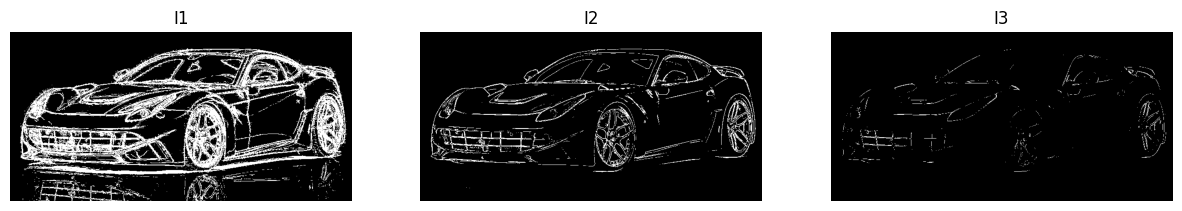

In [ ]:
def Grad_xy(f_prime_x_img,f_prime_y_img, tr):
  G_xy = np.sqrt((f_prime_x_img**2)+(f_prime_y_img**2))
  for i in range(G_xy.shape[0]):
    for j in range(G_xy.shape[1]):
      if G_xy[i,j] < tr:
        G_xy[i,j] = 0
      else :
        G_xy[i,j] = 255
  return G_xy

I1= Grad_xy(f_prime_x_img ,f_prime_y_img, 10)
I2= Grad_xy(f_prime_x_img ,f_prime_y_img, 45)
I3= Grad_xy(f_prime_x_img ,f_prime_y_img, 100)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(I1 , cmap='gray')
plt.title("I1")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(I2 , cmap='gray')
plt.title("I2")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(I3 , cmap='gray')
plt.title("I3")
plt.axis('off')


###### NMS

<ipython-input-10-7f54a015b863>:10: RuntimeWarning: divide by zero encountered in divide
  teta = np.abs(np.rad2deg(np.arctan(f_y/f_x)))
<ipython-input-10-7f54a015b863>:10: RuntimeWarning: invalid value encountered in divide
  teta = np.abs(np.rad2deg(np.arctan(f_y/f_x)))


(-0.5, 752.5, 372.5, -0.5)

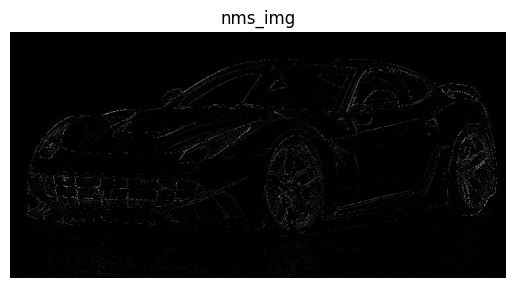

In [ ]:
# # %% Define functions
def non_max_sup(f_x, f_y):
    img_grad = np.sqrt((f_x**2 + f_y**2))
    padding = 1
    (img_H, img_W) = img_grad.shape
    nms_img = np.zeros(img_grad.shape)
    image = cv2.copyMakeBorder(img_grad, padding, padding, padding, padding,
            cv2.BORDER_REPLICATE)

    teta = np.abs(np.rad2deg(np.arctan(f_y/f_x)))
    teta +=90
    for i in np.arange(padding, img_H):
        for j in np.arange(padding, img_W):
            if teta[i,j]>180:
              teta = teta-180
            if teta[i,j]>=-22.5 and teta[i,j]<22.5 :
              p1=image[i+1,j]
              p5=image[i-1,j]
              p=image[i,j]
              V=np.array([p1, p, p5])
              max_v=np.max(V)
              min_v= np.min(V)
              if max_v==p or min_v == p:
                  nms_img[i,j]=image[i,j]
            elif teta[i,j]>=22.5 and teta[i,j]<(22.5+45) :
              p2=image[i+1,j-1]
              p6=image[i-1,j+1]
              p=image[i,j]
              V=np.array([p2, p, p6])
              max_V=np.max(V)
              min_V= np.min(V)
              if max_V==p or min_V==p:
                  nms_img[i,j]=image[i,j]
            elif teta[i,j]>=67.5 and teta[i,j]<(67.5+45):
              p3=image[i,j-1]
              p7=image[i,j+1]
              p=image[i,j]
              V=np.array([p3, p, p7])
              max_V=np.max(V)
              max_V=np.min(V)
              if max_V==p or min_V == p:
                  nms_img[i,j]=image[i,j]
            elif teta[i,j]>=112.5 and teta[i,j]<(112.5+45) :
              p4=image[i-1,j-1]
              p8=image[i+1,j+1]
              p=image[i,j]
              V=np.array([p4, p, p8])
              max_V=np.max(V)
              min_V=np.min(V)
              if max_V==p or min_V == p:
                  nms_img[i,j]=image[i,j]
    return nms_img

nms_img = non_max_sup(f_prime_x_img, f_prime_y_img)

plt.imshow(nms_img , cmap='gray')
plt.title("nms_img")
plt.axis('off')

###### Laplacian

(-0.5, 752.5, 372.5, -0.5)

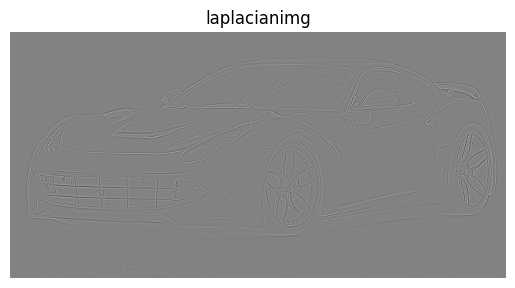

In [ ]:
laplacian_filter = np.array(([0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]))
size = gray_img.shape
m = laplacian_filter.shape[0]
laplacian_img = np.zeros([n[0]-(m-1), n[1]-(m-1)])

for i in range(1, n[0]-(m-1)):
  for j in range( 1, n[1]-(m-1)):

      I = gray_img[i:(i+m), j:(j+m)]
      laplacian_img[i, j] = np.sum(np.double(I)* laplacian_filter)

plt.imshow(laplacian_img , cmap='gray')
plt.title("laplacianimg")
plt.axis('off')

###### LoG

Sigma : 1


(-0.5, 746.5, 366.5, -0.5)

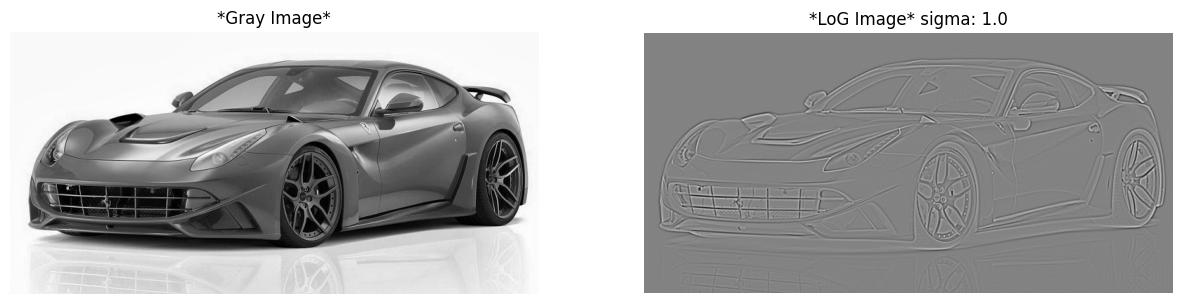

In [ ]:
s = float(input('Sigma : '))
def LOG( sigma):
    kernel = np.sqrt(2)*sigma
    if kernel <= 3:
      kernel = 3
    elif kernel%2 ==0:
      kernel = kernel - 1
    kernel = int(kernel)**2

    con = list(range(-(kernel//2), (kernel//2)+1))
    LoG_filter = np.ones((kernel, kernel))
    for i in range(kernel):
        for j in range(kernel):
            LoG_filter[i, j] = ((1 / (2 * np.pi * sigma**4)) * (((con[i]**2 + con[j]**2) / sigma**2) - 2))*np.exp(-((con[i]**2 + con[j]**2) / (2*sigma**2)))
    LoG_filter = LoG_filter/np.sum(np.abs(LoG_filter))
    return LoG_filter , kernel

LOG(s)


n = gray_img.shape

m=  LOG(s)[1]
LoG_filter = LOG(s)[0]
LoG_img = np.zeros([n[0]-(m-1), n[1]-(m-1)])
for i in range(1, n[0]-(m-1)):
  for j in range( 1, n[1]-(m-1)):

      I = gray_img[i:(i+m), j:(j+m)]
      LoG_img[i, j] = np.sum(np.double(I)*LoG_filter)


plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("*Gray Image*")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(LoG_img , cmap='gray')
plt.title(f"*LoG Image* sigma: {s}")
plt.axis('off')

###### Green Field

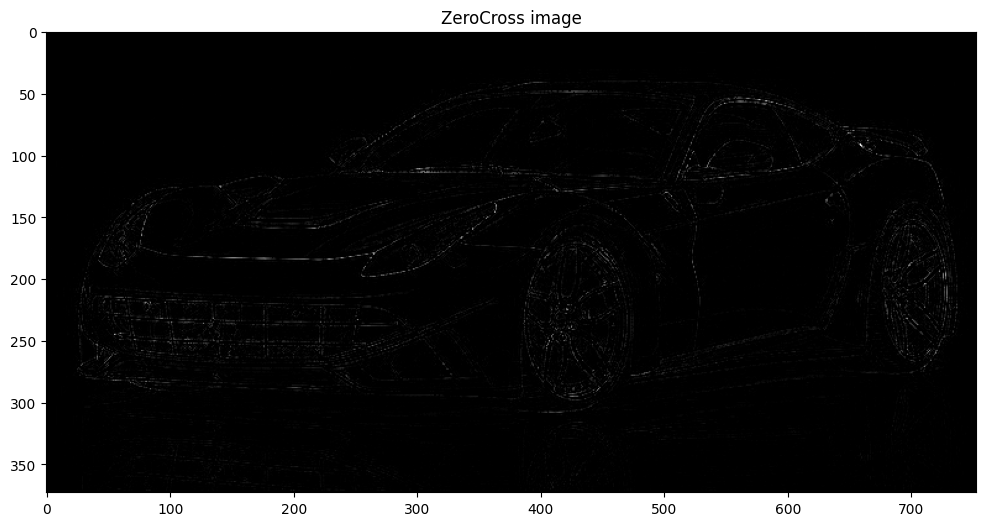

In [ ]:
def GreenField(image):
    greenfieldimage = np.zeros_like(image)
    n = image.shape
    for i in range(1, n[0] - 1):
        for j in range(1, n[1] - 1):
            if image[i, j] > 0:
                neighbour = [image[i+1, j], image[i-1, j], image[i, j+1], image[i, j-1]]
                abs_n = np.abs(neighbour)
                min_abs_n = np.min(abs_n)
                nn = np.sum(np.array(neighbour) < 0)

                if (nn > 0) or (nn < 4):
                    if min_abs_n < np.abs(image[i, j]):
                        greenfieldimage[i, j] = min_abs_n
                else:
                    greenfieldimage[i, j] = np.abs(image[i, j])
    return greenfieldimage

ZeroCross_img = GreenField(laplacian_img)
plt.figure(figsize = (12,8))
plt.title('ZeroCross image')
plt.imshow(ZeroCross_img, cmap = 'gray')

## Feature Matching in Stereo Aerial Images Using Python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def select_points(image_path, save_path, points_n=6):
        image = plt.imread(image_path)

        fig1 = plt.figure()
        plt.imshow(image, cmap='gray')
        plt.title('Select Points')
        plt.xlabel(f'Click {points_n} points on the image')

        # Allow the user to interactively select points
        points = plt.ginput(n=6, timeout=0, show_clicks=True)

        # Convert points to numpy array
        points_array = np.array(points)

        # Check if the desired number of points has been chosen
        if len(points_array) >= points_n:
            # Save points to a text file without comments
            np.savetxt(save_path, points_array, fmt='%d', header='x y')
            print(f"Points saved to {save_path}")

ImagePath = 'Data/1614.tif'
OutputPath = 'Data/points.txt'

select_points(ImagePath, OutputPath, points_n=6)



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2

# load image
image_l = plt.imread('Data/1614.tif')
image_r = plt.imread('Data/1615.tif')

# show points on image
points = np.loadtxt('Data/points.txt')
fig2 = plt.figure()
plt.imshow(image_l , cmap='gray')
plt.scatter(points[:, 0], points[:, 1], color='red', s=20)
plt.xlabel('Red dots represent loaded points')
plt.show()

# search space
Zp, f, Hd, pixel_size, Delta_z, b, s = 1883.73, 153.24e-3, 1883.73 + 766.2, 18e-6, 15, 77.5e-3, 1/5000
B = b / s
print(f'B:  {B}')
P_x = ((B * f)/(Hd-Zp))/pixel_size
print(f'parallax(pixel):  {(P_x)/pixel_size}')
X_second = np.round(points[:, 0] - P_x)
S = ((b * (Hd * Delta_z)) / ((Hd - Zp)**2))/ pixel_size
X_search_space = np.array([X_second - S//2, X_second + S//2]).T
print(X_search_space)


# show search space on image
cordinate = np.array([X_search_space[:, 0]+145,points[:, 1]-70])
width = 290
height = 140

fig, ax = plt.subplots()

plt.imshow(image_r, cmap='gray')
for i in range(6):
    rect = patches.Rectangle((cordinate[0, i], cordinate[1, i]), width, height, linewidth=1, edgecolor='green', facecolor='none')
    print(rect)
    ax.add_patch(rect)
plt.xlabel('Search space in right image')
plt.show()


Epipolar_Data = {'X_search_space': X_search_space,
                 'X_pp': X_second, 'template_points': points}
print(Epipolar_Data)

# gaussian_2d
def gaussian_2d(kernel, sigma):
    con = list(range(-(kernel//2), (kernel//2)+1))
    G2D_filter = np.ones((kernel, kernel))
    for i in range(kernel):
        for j in range(kernel):
            G2D_filter[i, j] = (1/(2*np.pi*sigma**2))*np.exp((-(con[i]**2+con[j]**2)/(2*sigma**2)))
    return G2D_filter , kernel


def mean2(x):
    y = np.sum(x) / np.size(x)
    return y


def Correlation(a, b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum())
    return r


def Matching_cross_correlation(image, left_img, Epipolar_Data, kernel_size, threshold):
    coordinates_of_matched = np.zeros(Epipolar_Data['template_points'].shape)
    kernel_size = kernel_size[0]

    for ii, template_point in enumerate(Epipolar_Data['template_points']):
        search_space = image[int(template_point[1]) - 200: int(template_point[1]) + 200, int(Epipolar_Data['X_search_space'][ii][0]): int(Epipolar_Data['X_search_space'][ii][1])]

        template_roi = left_img[int(template_point[1]) - kernel_size // 2:int(template_point[1]) + kernel_size // 2 + 1,
                                int(template_point[0]) - kernel_size // 2:int(template_point[0]) + kernel_size // 2 + 1]

        corrs_search_space = np.zeros(search_space.shape)

        for i in range(1, search_space.shape[1] - 1):
            for j in range(1, search_space.shape[0] - 1):
                roi = search_space[i:i + kernel_size, j:j + kernel_size]
                try:
                    corrs_search_space[i, j] = Correlation(template_roi, roi)
                except:
                    pass

        max_correlation = np.nanmax(corrs_search_space)
        if np.abs(max_correlation) >= threshold:
            up_left_coor = np.array([Epipolar_Data['X_search_space'][ii][0],
                                     int(template_point[1] - (search_space.shape[0] / 2))])
            coor_x = np.where(corrs_search_space == max_correlation)[1][0]
            coor_y = np.where(corrs_search_space == max_correlation)[0][0]
            coordinates_of_matched[ii, :] = np.array([up_left_coor[0] + coor_x, up_left_coor[1] + coor_y])
    return coordinates_of_matched, corrs_search_space

def show_points_on_image(image, points_path):
        try:
            plt.imshow(image)
            plt.title('Points on Image')
            try:
                points = np.loadtxt(points_path)
            except:
                points = points_path
            plt.scatter(points[:, 0], points[:, 1], color='red', s=20)

            plt.xlabel('Red dots represent loaded points')
            plt.show()
            return points
        except Exception as e:
            print(f"Error occurred: {e}")


# Matching

[coordinate_of_searched, corrs_search_space] = Matching_cross_correlation(image_r, image_l, Epipolar_Data, [21, 21], 0.4)

down_img_new = image_r
for i in range(coordinate_of_searched.shape[0]):
    down_img_new = cv2.rectangle(down_img_new, (int((coordinate_of_searched[i, 0]-145)//1), int((coordinate_of_searched[i, 1]-70)//1)), (int(
        (coordinate_of_searched[i, 0]+145)//1), int((coordinate_of_searched[i, 1]+70)//1)), (0, 255, 0), 50)
    down_img_new = cv2.circle(down_img_new, (int(
        (coordinate_of_searched[i, 0])//1), int((coordinate_of_searched[i, 1])//1)), 20, [255, 255, 125], 20)
plt.imsave('Data/matched21.jpg', down_img_new, cmap='gray')

print(coordinate_of_searched)

# Matching with gussian

# [coordinate_of_searched_g, corrs_search_space_g] = Matching_cross_correlation(blurred_right, blurred_left, Epipolar_Data, [21, 21], 0.4)

# down_img_new = image_r
# for i in range(coordinate_of_searched_g.shape[0]):
#     down_img_new = cv2.rectangle(down_img_new, (int((coordinate_of_searched_g[i, 0]-300)//1), int((coordinate_of_searched_g[i, 1]-300)//1)), (int(
#         (coordinate_of_searched_g[i, 0]+300)//1), int((coordinate_of_searched_g[i, 1]+300)//1)), (0, 255, 0), 50)
#     down_img_new = cv2.circle(down_img_new, (int(
#         (coordinate_of_searched_g[i, 0])//1), int((coordinate_of_searched_g[i, 1])//1)), 50, [255, 0, 0], 10)
# plt.imsave('D:\\KNTU\\term1\\Digital Photogrammetry\\Exercise\\Exercise_3\\matched_g.jpg', down_img_new, cmap='gray')

## Corner Detection in Images

In [ ]:
import numpy as np
import cv2
from  matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
import random

# Load image
# gray_img = cv2.imread('cameraman.jpg',0)
gray_img = cv2.imread('Data/I1.tif',0)


def sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    padded_image = np.pad(gray_img, 1, mode='edge')  # Assuming 'image' is a grayscale image

    sobelx = np.zeros_like(gray_img, dtype=np.float64)
    sobely = np.zeros_like(gray_img, dtype=np.float64)

    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            sobelx[i, j] = np.sum(sobel_x * padded_image[i:i+3, j:j+3])
            sobely[i, j] = np.sum(sobel_y * padded_image[i:i+3, j:j+3])

    return sobelx, sobely


assert gray_img.shape != None
sobelx, sobely =  sobel(gray_img)
sobell = np.sqrt(sobelx**2 + sobely**2)

def Grad_xy(f_prime_x_img,f_prime_y_img, tr):
  G_xy = np.sqrt((f_prime_x_img**2)+(f_prime_y_img**2))
  for i in range(G_xy.shape[0]):
    for j in range(G_xy.shape[1]):
      if G_xy[i,j] < tr:
        G_xy[i,j] = 0
      else :
        G_xy[i,j] = 255
  return G_xy

I1= Grad_xy(sobelx, sobely, 75)

plt.figure(figsize=(15,15))
plt.imshow(I1 , cmap='gray')
plt.title("I1")
plt.axis('off')


# make buffer
buffer = np.zeros((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)

# copy edges to buffer
for i in range(I1.shape[0]):
    for j in range(I1.shape[1]):
        if I1[i, j] > 0:
            buffer[i-5:i+5, j-5:j+5] = gray_img[i-5:i+5, j-5:j+5]


# show buffer
plt.figure(figsize=(15,15))
plt.imshow(buffer , cmap='gray')
plt.title("buffer")
plt.axis('off')

print( np.where(buffer != 0))


def self_similarity_corr(img, edge_img, kernel=(3, 3), constraint_mask=False, d = None):
    assert img.shape != None
    imgh, imgw = img.shape
    print(imgh, imgw)
    kernel_size = kernel[0]
    respones = np.zeros_like(img)

    corner_points = []

    for i in range(kernel_size // 2, imgh - kernel_size // 2 ):
        for j in range(kernel_size // 2, imgw - kernel_size // 2):
            if edge_img[i, j] == 255:
                ROI_ref = img[i - kernel_size // 2:i + kernel_size // 2 + 1, j - kernel_size // 2:j + kernel_size // 2 + 1]

                neighbor_correlation = np.zeros(kernel_size * kernel_size - 1)
                index = 0
                for x in range(i - 1, i + 2):
                    for y in range(j - 1, j + 2):
                        if x != i or y != j:
                            ROI_moving = img[x - kernel_size // 2:x + kernel_size // 2 + 1, y - kernel_size // 2:y + kernel_size // 2 + 1]
                            try:
                                neighbor_correlation[index] = correlation_coefficient(ROI_ref, ROI_moving)
                            except ValueError:
                                neighbor_correlation[index] = 0
                            index += 1

                if np.nanmax(np.abs(neighbor_correlation)) != 1:
                    corner_points.append([i, j, np.nanmax(np.abs(neighbor_correlation))])

                if constraint_mask:
                    if len(corner_points) > 2:
                        last = np.array(corner_points[-1][:2])
                        two_last = np.array(corner_points[-2][:2])
                        h = 1 - np.exp(-(np.sum(last - two_last))**2 / d**2)
                        corner_points[-1][-1] = corner_points[-1][-1]  * h

    return np.array(corner_points)


def correlation_coefficient(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    covariance = np.mean((X - mean_X) * (Y - mean_Y))
    var_X = np.mean((X - mean_X)**2)
    var_Y = np.mean((Y - mean_Y)**2)

    corr_coeff = covariance / np.sqrt(var_X * var_Y) if var_X != 0 and var_Y != 0 else np.nan

    return corr_coeff


def final_point(corner_points):
    print(corner_points)
    sorted_indices = np.argsort(corner_points[:, 2])
    sorted_corners = corner_points[sorted_indices]
    min_corner = sorted_corners[-500,2]
    # print(sorted_corners, min_corner)
    final_corner = np.zeros([500, 3])
    print(final_corner.shape)
    con = 0
    for i in np.arange(corner_points.shape[0] - 1):
            if corner_points[i, 2] >= min_corner:
                final_corner[con, 2] = corner_points[i, 2]
                final_corner[con, :2] = corner_points[i, :2]
                con = con+1
    return final_corner


final  = self_similarity_corr(buffer, I1, constraint_mask=True, d =50)
print(points)
fig2 = plt.figure(figsize=(20,20))
plt.imshow(buffer , cmap='gray')
plt.scatter(points[:, 1], points[:, 0], color='red', s=20)
plt.xlabel('Red dots is corner points')
plt.show()


def Harris_corner_detector(img, kernel=[3, 3],  k=0.05):


    Ix, Iy = sobelx, sobely
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy

    [imgH, imgW] = gray_img.shape
    kernel_size = kernel[0]
    padding = (kernel_size-1)//2
    img = cv2.copyMakeBorder(img, padding, padding,
                             padding, padding, cv2.BORDER_REPLICATE)

    corner_i_j = np.array([[], []])
    R_x_y = np.zeros([imgH+2*padding, imgW+2*padding])
    for i in np.arange(padding, imgH):
        for j in np.arange(padding, imgW):
            ROI_Ixx = Ixx[i-padding:i+padding+1, j-padding:j+padding+1]
            ROI_Iyy = Iyy[i-padding:i+padding+1, j-padding:j+padding+1]
            ROI_Ixy = Ixy[i-padding:i+padding+1, j-padding:j+padding+1]
            sum_ROI_Ixx = ROI_Ixx.sum()
            sum_ROI_Iyy = ROI_Iyy.sum()
            sum_ROI_Ixy = ROI_Ixy.sum()
            Det_M = (sum_ROI_Ixx * sum_ROI_Iyy) - sum_ROI_Ixy**2
            Trace_M = sum_ROI_Ixx + sum_ROI_Iyy
            R_x_y[i, j] = Det_M - k * (Trace_M**2)
        if i % 50 == 0:
            print('%d/%d lines processed...' % (i, imgH))
    return R_x_y

H_scores = Harris_corner_detector(
    buffer, kernel=[3, 3], k=0.05)
tre = np.abs(26*H_scores.mean())
line, sample = np.where(H_scores > tre)
corner_x_y = np.array([line, sample])
img_draw_harris = buffer
img_draw_harris = cv2.copyMakeBorder(img_draw_harris, 1+1, 1+1, 1+1, 1+1,
                                     cv2.BORDER_REPLICATE)
plt.figure(figsize=(15,15))
plt.scatter(corner_x_y[1, :], corner_x_y[0, :], color='red', s=20)
plt.imshow(img_draw_harris , cmap = 'gray')
plt.title("buffer")
plt.axis('off')


final1  = Harris_corner_detector(
    buffer, kernel=[3, 3], k=0.05)
flat_responses = final1.flatten()
top_500_indices = np.argsort(flat_responses)[-500:]
height, width =final1.shape[:2]
top_500_coords = [(ind // width, ind % width) for ind in top_500_indices]

radius = 1
image_with_circles = np.copy(gray_img)
for coord in top_500_coords:
    x, y = coord[1], coord[0]
    cv2.circle(image_with_circles, (x, y), radius, (0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(image_with_circles , cmap='gray')
plt.title("buffer")
plt.axis('off')



## Image Feature Description and Matching

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_0 = cv2.imread('Data/I1.tif', cv2.IMREAD_GRAYSCALE)
image_1 = cv2.imread('Data/I2.tif', cv2.IMREAD_GRAYSCALE)
# image_0 = cv2.imread('Data/eagle_left.jpg', cv2.IMREAD_GRAYSCALE)
# image_1 = cv2.imread('Data/eagle_right3.jpg', cv2.IMREAD_GRAYSCALE)
# image_0 = cv2.imread('Data/pic_1.jpg', cv2.IMREAD_GRAYSCALE)
# image_1 = cv2.imread('Data/pic_2.jpg', cv2.IMREAD_GRAYSCALE)

def sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    padded_image = np.pad(image, 1, mode='edge')  # Assuming 'image' is a grayscale image

    sobelx = np.zeros_like(image, dtype=np.float64)
    sobely = np.zeros_like(image, dtype=np.float64)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sobelx[i, j] = np.sum(sobel_x * padded_image[i:i+3, j:j+3])
            sobely[i, j] = np.sum(sobel_y * padded_image[i:i+3, j:j+3])

    return sobelx, sobely

def Harris_corner_detector(img,sobelx, sobely, kernel=[3, 3],  k=0.05):
    Ix, Iy = sobelx, sobely
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy

    [imgH, imgW] = img.shape
    kernel_size = kernel[0]
    padding = (kernel_size-1)//2
    img = cv2.copyMakeBorder(img, padding, padding,
                             padding, padding, cv2.BORDER_REPLICATE)

    corner_i_j = np.array([[], []])
    R_x_y = np.zeros([imgH+2*padding, imgW+2*padding])
    for i in np.arange(padding, imgH):
        for j in np.arange(padding, imgW):
            ROI_Ixx = Ixx[i-padding:i+padding+1, j-padding:j+padding+1]
            ROI_Iyy = Iyy[i-padding:i+padding+1, j-padding:j+padding+1]
            ROI_Ixy = Ixy[i-padding:i+padding+1, j-padding:j+padding+1]
            sum_ROI_Ixx = ROI_Ixx.sum()
            sum_ROI_Iyy = ROI_Iyy.sum()
            sum_ROI_Ixy = ROI_Ixy.sum()
            Det_M = (sum_ROI_Ixx * sum_ROI_Iyy) - sum_ROI_Ixy**2
            Trace_M = sum_ROI_Ixx + sum_ROI_Iyy
            R_x_y[i, j] = Det_M - k * (Trace_M**2)
        if i % 50 == 0:
            print('%d/%d lines processed...' % (i, imgH))
    return R_x_y

def keypoint(image, kernel_size_harris=3):
    Ix, Iy = sobel(image)
    R = Harris_corner_detector(image, Ix, Iy, kernel=(kernel_size_harris, kernel_size_harris))
    keypoints = np.argwhere(R > (np.abs(26*R.mean())))
    sorted_keypoints = keypoints[np.argsort(-R[keypoints[:, 0], keypoints[:, 1]])]
    top_keypoints = sorted_keypoints
    return top_keypoints



def Euclidean_dis(vec1, vec2):
    return np.sqrt(np.sum((np.array(vec1) - np.array(vec2))**2))


def Descriptors_GV(image, descriptor_size, keypoints):
    descriptorsGV = []
    start = descriptor_size // 2
    sobel_x, sobel_y = sobel(image)

    for kp in keypoints:
        i, j = int(kp[0]), int(kp[1])

        descriptor = image[i - start:i + start + 1, j - start:j + start + 1]
        descriptorsGV.append([descriptor, i, j])
    return descriptorsGV

def Descriptors_Grad(image, descriptor_size, keypoints):
    descriptorsGrad = []
    start = descriptor_size // 2
    sobel_x, sobel_y = sobel(image)

    for kp in keypoints:
        i, j = int(kp[0]), int(kp[1])

        descriptor = np.sqrt(sobel_x[i - start:i + start + 1, j - start:j + start + 1]**2
                        + sobel_y[i - start:i + start + 1, j - start:j + start + 1]**2)
        descriptorsGrad.append([descriptor, i, j])
    return descriptorsGrad

def MatchedPoints(image_0, image_1, keypoints_1, keypoints_2, matched_points, line_thickness=1):
    img_matches = np.concatenate((image_0, image_1), axis=1)
    img_matches = cv2.cvtColor(img_matches, cv2.COLOR_GRAY2RGB)

    for pair in matched_points[:150]:
        pt1 = tuple(map(int, keypoints_1[pair[0]]))
        pt2 = tuple(map(int, np.array(keypoints_2[pair[1]]) + [0, image_0.shape[1]]))

        cv2.circle(img_matches, pt1[::-1], 2, [0,255,0], 2)
        cv2.circle(img_matches, pt2[::-1], 2, [0,255,0], 2)
        cv2.line(img_matches, pt1[::-1], pt2[::-1], [255,0,0], line_thickness)

    return img_matches


def Find_best_match(image_0, image_1, descriptor = 'gv', threshold=150, descriptor_size=11):
    matched_points = []
    points_1 = keypoint(image_0)
    points_2 = keypoint(image_1)
    if descriptor == 'gv':
        desc_0 = Descriptors_GV(image_0,  descriptor_size, points_1)
        desc_1 = Descriptors_GV(image_1, descriptor_size, points_2)
    elif descriptor == 'grad':
        desc_0 = Descriptors_Grad(image_0,  descriptor_size, points_1)
        desc_1 = Descriptors_Grad(image_1, descriptor_size, points_2)

    for i, kp1 in enumerate(desc_0):
        min_distance = float('inf')
        best_match = None

        for j, kp2 in enumerate(desc_1):
            try:
                distance = Euclidean_dis(kp1[0], kp2[0])
            except:
                pass

            if distance < min_distance:
                min_distance = distance
                best_match = j
        if min_distance < threshold:
            matched_points.append((i, best_match))

    matched_image = MatchedPoints(image_0, image_1, points_1, points_2, matched_points)
    return matched_image


radius = 1
image_with_circles = np.copy(image_0)
top_coords = keypoint(image_0, kernel_size_harris=3)
for coord in top_coords:
    x, y = coord[1], coord[0]
    cv2.circle(image_with_circles, (x, y), radius, (0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(image_with_circles , cmap='gray')
plt.title("Harris")
plt.axis('off')
plt.show()


result = Find_best_match(image_0, image_1)
plt.figure(figsize=(15,15))
plt.imshow(result)
plt.show()



## Semi-Automatic Interior Orientation in Digital Photogrammetry

In [ ]:
## import lib
import matplotlib.pyplot as plt
import numpy as np
##
def select_points(image_path, save_path, points_n=2):
        image = plt.imread(image_path)

        fig1 = plt.figure()
        plt.imshow(image, cmap='gray')
        plt.title('Select Points')
        plt.xlabel(f'Click {points_n} points on the image')

        # Allow the user to interactively select points
        points = plt.ginput(n=2, timeout=0, show_clicks=True)

        # Convert points to numpy array
        points_array = np.array(points)

        # Check if the desired number of points has been chosen
        if len(points_array) >= points_n:
            # Save points to a text file without comments
            np.savetxt(save_path, points_array, fmt='%d', header='x y')
            print(f"Points saved to {save_path}")

ImagePath = 'Data/1614.tif'
OutputPath = 'Data/points.txt'

select_points(ImagePath, OutputPath, points_n=2)




In [ ]:
import math
from scipy import signal
from matplotlib import pyplot as plt
import cv2
import math
import matplotlib
import matplotlib.patches as patches
import numpy as np
matplotlib.use('tkagg')

img = plt.imread('Data/1614.tif')

def mean2(x):
    y = np.sum(x) / np.size(x)
    return y


def Correlation(a, b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum())
    return r


def Matching_cross_correlation(image, Template,init_points, coordinate_of_matched, kernel, tr, stride):
    coordinates_of_matched = np.zeros([init_points.shape[0],2])
    image = cv2.copyMakeBorder(image, 100, 100, 100, 100,
                               cv2.BORDER_REPLICATE)
    k = 50
    for ii in range(init_points.shape[0]):
        search_space = image[int(init_points[ii, 0])-400:int(init_points[ii, 0]) +
                             400, int(init_points[ii, 1])-400:int(init_points[ii, 1])+400]
        (imgH, imgW) = search_space.shape
        (kH, kW) = kernel

        padding = (kW - 1) // 2
        search_space = cv2.copyMakeBorder(search_space, padding, padding, padding, padding,
                                          cv2.BORDER_REPLICATE)
        corrs_search_space = np.zeros(search_space.shape)

        for i in np.arange(padding+1, imgH, stride):
            for j in np.arange(padding+1, imgW, stride):
                ROI = search_space[i - padding-1:i + padding +
                                   1, j - padding-1:j + padding + 1]
                corrs_search_space[i, j] = Correlation(Template, ROI)
            # if i % 50 == 0:
            #     print('%3d/%2d lines processed' %
            #           (k, imgH * init_points.shape[0]))
            #     k+=50
        max_correlation = np.max(corrs_search_space)
        if np.abs(max_correlation) >= tr:
            coor_x = np.where(corrs_search_space == max_correlation)[1][0]
            coor_y = np.where(corrs_search_space == max_correlation)[0][0]
            up_left_coor = np.array(
                [init_points[ii, 0]-400, init_points[ii, 1]-400])
            coordinates_of_matched[ii, :] = np.array(
                [up_left_coor[1] + coor_x, up_left_coor[0] + coor_y])

    return coordinate_of_matched, corrs_search_space


points = np.loadtxt('Data/points.txt')
points = np.array(points)
draw_points = points
# print(draw_points)

Fidiu_x = np.array([106.001,-106.001,-106.002,106.005,0.003,-109.997,0.003,110.006])
Fidiu_y = np.array([-106.001,-106.001,106.003,106.006,-110,-0.001,110.001,0])
x6 = -109.997  # point6
y6 = -0.001  # point6
x8 = 110.006  # point8
y8 = 0  # point8
A_Conformal = np.array([[x6, y6, 1, 0], [y6, -x6, 0, 1],
                        [x8, y8, 1, 0], [y8, -x8, 0, 1]])
dL = np.array([[draw_points[0, 0]], [draw_points[0, 1]],
               [draw_points[1, 0]], [draw_points[1, 1]]])
M = np.linalg.inv(np.dot(np.transpose(A_Conformal), A_Conformal))
N = np.dot(np.transpose(A_Conformal), dL)
# print(M.shape,N.shape)
Delta_conformal = np.dot(M, N)
k = 0
A = np.zeros([Fidiu_x.shape[0] * 2, 4])
for i in range(Fidiu_x.shape[0]):
    A[k:k+2, :] = np.array([[Fidiu_x[i], Fidiu_y[i], 1, 0],
                            [Fidiu_y[i], -Fidiu_x[i], 0, 1]])
    k += 2
New_xy = np.dot(A, Delta_conformal)
# print(New_xy, New_xy.shape)
New_xy = np.reshape(New_xy, [8, 2])
# print(New_xy, New_xy.shape)

Template = img[int(draw_points[0, 1])-65:int(draw_points[0, 1])+65,
               int(draw_points[0, 0])-65:int(draw_points[0, 0])+65]
coordinate_of_searched, corrs_search_space = Matching_cross_correlation(img,Template,New_xy,New_xy,[130, 130], 0.2, 5)
coordinate_of_matched = []
down_img_new = img # image for drawing shapes on it.
for i in range(coordinate_of_searched.shape[0]):
    down_img_new = cv2.rectangle(down_img_new, (int((coordinate_of_searched[i, 0]-300)//1), int((coordinate_of_searched[i, 1]-300)//1)), (int(
        (coordinate_of_searched[i, 0]+300)//1), int((coordinate_of_searched[i, 1]+300)//1)), (0, 0, 255), 50)
    down_img_new = cv2.circle(down_img_new, (int(
        (coordinate_of_searched[i, 0])//1), int((coordinate_of_searched[i, 1])//1)), 50, [0, 0, 255], 10)

print(coordinate_of_searched)
plt.imshow(down_img_new, cmap='gray')
plt.show()

projective_fid_x = Fidiu_x[:3]
projective_fid_y = Fidiu_y[:3]
x1 = 106.001  # point1
y1 = -106.001  # point1
x2 = -106.001  # point2
y2 = -106.001  # point2
x3 = -106.002  # point3
y3 = 106.003  # point3
x4 = 106.002  # point4
y4 = 106.003  # point4
dl = np.array([[coordinate_of_searched[0, 0]], [coordinate_of_searched[0, 1]],
                [coordinate_of_searched[1, 0]], [coordinate_of_searched[1, 1]],
               [coordinate_of_searched[2, 0]], [coordinate_of_searched[2, 1]],
               [coordinate_of_searched[3, 0]], [coordinate_of_searched[3, 1]]])
A_Projective = np.array([[x1, y1, 1, 0, 0, 0, float(-x1*dl[0]), float(-y1*dl[0])],
                        [0, 0, 0, x1, y1, 1, float(-x1*dl[1]), float(-y1*dl[1])],
                        [x2, y2, 1, 0, 0, 0, float(-x2*dl[2]), float(-y2*dl[2])],
                        [0, 0, 0, x2, y2, 1, float(-x2*dl[3]), float(-y2*dl[3])],
                        [x3, y3, 1, 0, 0, 0, float(-x3*dl[4]), float(-y3*dl[4])],
                        [0, 0, 0, x3, y3, 1, float(-x3*dl[5]), float(-y3*dl[5])],
                        [x4, y4, 1, 0, 0, 0, float(-x4*dl[6]), float(-y4*dl[6])],
                        [0, 0, 0, x4, y4, 1, float(-x4*dl[7]), float(-y4*dl[7])]])

MM = np.linalg.inv(np.dot(np.transpose(A_Projective), A_Projective))
NN = np.dot(np.transpose(A_Projective), dl)
Delta_projective = np.dot(MM, NN)

dl = np.zeros((16, 1))
for i in range(8):
    dl[2*i] = coordinate_of_searched[i, 0]
    dl[2*i + 1] = coordinate_of_searched[i, 1]

AA = []
for i in range(len(Fidiu_x)):
    AA.append([float(Fidiu_x[i]), float(Fidiu_y[i]), 1, 0, 0, 0, float(-x1*dl[i*2]), float(-y1*dl[i*2])])
    AA.append([0, 0, 0, float(Fidiu_x[i]), float(Fidiu_y[i]), 1, float(-x1*dl[i*2+1]), float(-y1*dl[i*2+1])])

AA = np.array(AA)
New_xy = np.dot(AA, Delta_projective)
New_xy = np.reshape(New_xy, [8, 2])

cv2.line(down_img_new, (int(New_xy[0,0]), int(New_xy[0,1])), (int(New_xy[2,0]), int(New_xy[2,1])), [255,25,20],50)
cv2.line(down_img_new, (int(New_xy[1,0]), int(New_xy[1,1])), (int(New_xy[3,0]), int(New_xy[3,1])), [255,25,20],50)
cv2.line(down_img_new, (int(New_xy[4,0]), int(New_xy[4,1])), (int(New_xy[6,0]), int(New_xy[6,1])), [255,25,20],50)
cv2.line(down_img_new, (int(New_xy[5,0]), int(New_xy[5,1])), (int(New_xy[7,0]), int(New_xy[7,1])), [255,25,20],50)
plt.imsave('Data/Matched_Fid.jpg', down_img_new, cmap='gray')
plt.imshow(down_img_new, cmap='gray')
plt.show()
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]
    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')
    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y
point_of_intersection = line_intersection(([New_xy[0,0], New_xy[0,1]],[New_xy[2,0], New_xy[2,1]]),([New_xy[1,0], New_xy[1,1]],[New_xy[3,0], New_xy[3,1]]))
print(point_of_intersection)